In [1]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
from htmresearch.support.cans.utils import *
import numpy as np

%load_ext autoreload
%autoreload 2

with open("./data/PlaceWeightsI.npz", "r") as f:
    npzfiles = np.load(f)

    W = npzfiles["arr_0"]



(100, 1000)


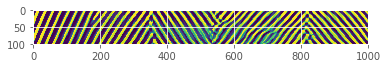

In [5]:
print W.shape

plt.imshow(W)

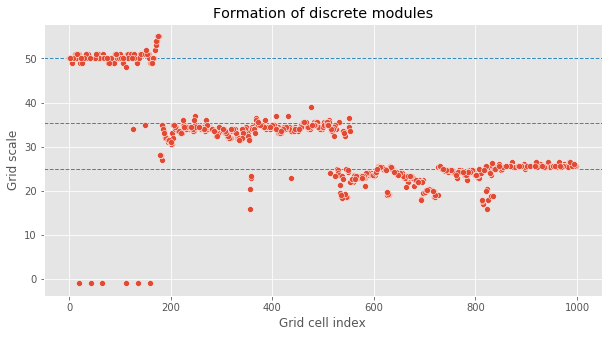

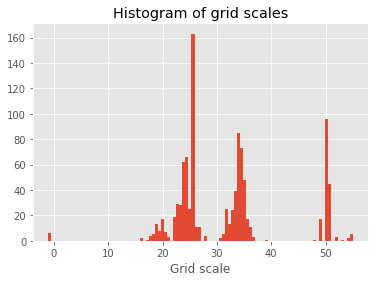

In [43]:
plt.style.use('ggplot')
# plt.style.use('default')
# plt.style.use('seaborn-whitegrid')

def normalize_columns(W):
    W_ = np.zeros(W.shape)
    for i in range(W.shape[1]):
        
        W_[:,i] = W[:,i]/np.amax(W[:,i])
    return W_

W = normalize_columns(W)

pc, gc = W.shape


scales = np.zeros(gc)
for i in range(gc):
    f = 0. + (W[:,i] > 0.5)
    df = f[1:] - f[:-1]
    ind = np.where(df == -1.)[0]
    ind = ind.astype(float)
    if len(ind) > 1:
        scales[i] = np.mean(ind[1:] - ind[:-1])

    else:
        scales[i] = -1.


pc_inter_spacing = 1.
plt.figure(figsize=(10,5))
plt.title("Formation of discrete modules")
perm  = np.random.permutation(gc)
plt.scatter(np.arange(gc)[perm], scales[perm]*pc_inter_spacing, color="C0" ,edgecolor="white", marker="o", zorder=2.)
min_scale = 25.*pc_inter_spacing
for i in range(3):
    h_val = min_scale * np.sqrt(2)**i 
    plt.axhline(h_val,linestyle='--', color="C1", zorder=1., linewidth=1.)

plt.xlabel("Grid cell index")
plt.ylabel("Grid scale")

plt.show()


plt.title("Histogram of grid scales")
plt.hist(scales, bins=100);
plt.xlabel("Grid scale")
plt.show()



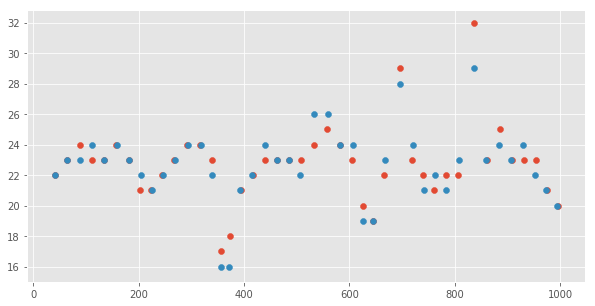

[ 22.  23.  23.  24.  23.  24.  23.  22.  21.  22.  23.  24.  24.  22.  16.
  16.  21.  22.  24.  23.  23.  22.  26.  26.  24.  24.  19.  19.  23.  28.
  24.  21.  22.  21.  23.  29.  23.  24.  23.  24.  22.  21.  20.]


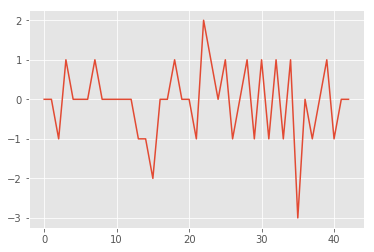

In [41]:
plt.style.use('ggplot')
# plt.style.use('default')
# plt.style.use('seaborn-whitegrid')

def normalize_rows(W):
    W_ = np.zeros(W.shape)
    for i in range(W.shape[0]):
        W_[i] = W[i]/np.amax(W[i])
    return W_


W = normalize_rows(W)

pc, gc = W.shape


scales = np.zeros(gc)
bump_dist = []
bump_pos  = []
for j in range(pc):

    f = 0. + (W[j,:] > 0.5)
    df = f[1:] - f[:-1]
    ind = np.where(df == -1.)[0]
    ind = ind.astype(float)
    ind = np.array(ind)
    if len(ind) > 1:
        bump_dist.append(ind[1:] - ind[:-1])
        bump_pos.append(ind[1:])

    
plt.figure(figsize=(10,5))

plt.scatter(bump_pos[0] , bump_dist[0])
plt.scatter(bump_pos[-1], bump_dist[-1])
plt.show()
print bump_dist[-1] 

plt.plot(bump_dist[-1] - bump_dist[0])
plt.show()
    